In [1]:
%matplotlib inline

import os

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

homedir = os.environ['HOME']
datapath = os.path.join(
    homedir, 'dev/NflBigData/data/kaggle/train.csv'
)

data = pd.read_csv(datapath, low_memory=False)

In [2]:
to_left = data['PlayDirection'] == 'left'
data['Xstd'] = (to_left * 120) - data['X'] + (~to_left * 2 * data['X'])
data['Ystd'] = (to_left * 53.3) - data['Y'] + (~to_left * 2 * data['Y'])

In [3]:
# show goal lines in cyan, fifty in magenta
line_colors = ['c'] + ['k'] * 9 + ['c']
fifty = (len(list(range(10, 120, 10))) - 1) // 2
line_colors[fifty] = 'm'

# colors for positions and their transformations
color_ids = ['red'] * 11 + ['blue'] * 11
t_color_ids = ['black'] * 11 + ['green'] * 11

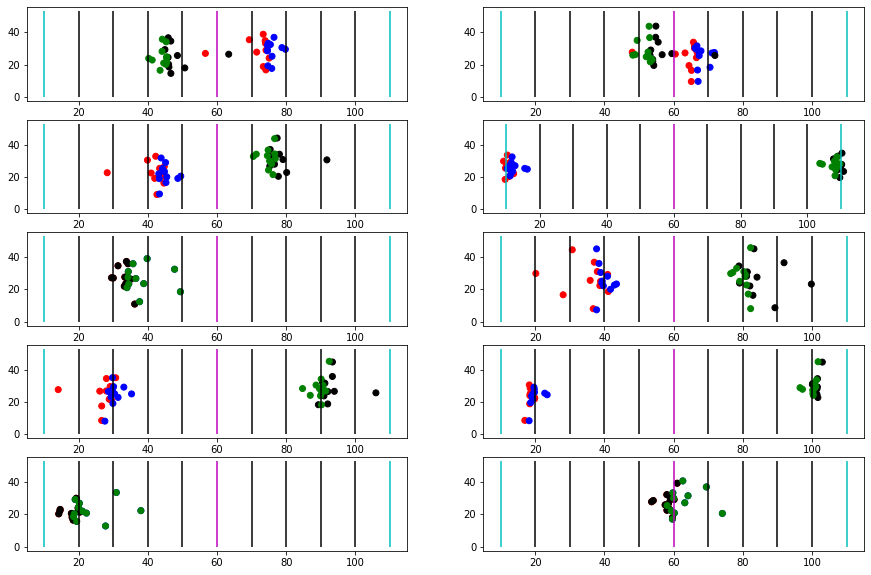

In [4]:
import itertools
sp_wd, sp_ht = 5, 3
num_rows, num_cols = 5, 2
fig, ax = plt.subplots(
    num_rows, num_cols, figsize=(num_rows * sp_ht, num_cols * sp_wd)
)

for counter, (x, y) in enumerate(itertools.product(range(num_rows), range(num_cols))):
    play_data = data[counter*22: (counter+1)*22]
    ax[x][y].vlines([range(10, 120, 10)], 0, 53, colors=line_colors)
    ax[x][y].scatter(play_data['X'], play_data['Y'], color=color_ids)
    ax[x][y].scatter(play_data['Xstd'], play_data['Ystd'], color=t_color_ids)
    counter += 1